# Class 19: Error Rates and Statistical Power

CBE 20258. Numerical and Statistical Analysis. Spring 2020.

&#169; Alexander Dowling, University of Notre Dame

In [1]:
# load libraries
import scipy.stats as stats
import numpy as np
import math
import matplotlib.pyplot as plt

## Class 19 Learning Objectives

After studying this notebook, completing the activities, participating in class, and reviewing your notes, should be able to:
* Formulate null and alternative hypotheses from a problem description
* Draw conclusions by interpreting a calculated P-value
* Explain Type I and Type II errors in the context of an application
* Predict Type I and Type II error rates (including statistical power calculations)
* Calculate minimum sample size based on Type I and Type II error rate specifications

### 19d. Exploring Statistical Power in Python

The statistical power calculations above were for a z-test, which is reasonable with a large sample size (recall the CLT). Power calculations are more intricate with the t-distribution and other statistical tests.

We will now look at some tools to explore statistical power in Python. Here are some tutorials with more information:
* https://towardsdatascience.com/introduction-to-power-analysis-in-python-e7b748dfa26
* https://machinelearningmastery.com/statistical-power-and-power-analysis-in-python/
* https://www.statsmodels.org/stable/stats.html

Here is the documentation for the function we will use: https://www.statsmodels.org/stable/generated/statsmodels.stats.power.TTestPower.power.html#statsmodels.stats.power.TTestPower.power

<div style="background-color: rgba(0,0,255,0.05) ; padding: 10px; border: 1px solid darkblue;"> 
<b>Class Activity</b>: Discuss the code and plot below.
</div>

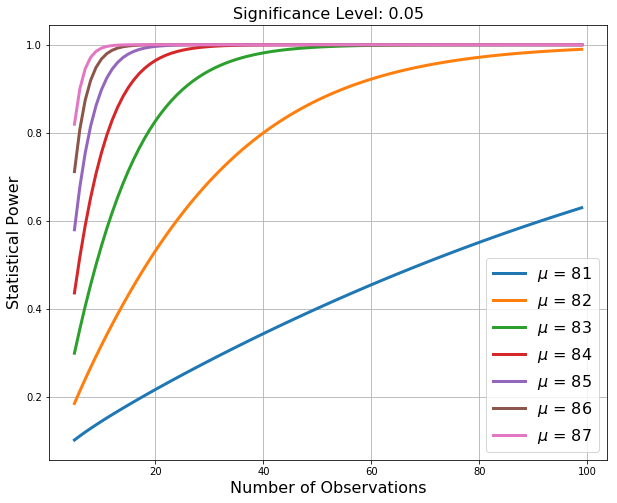

In [18]:
# Import tools for power calculations for one-sample t-test
from statsmodels.stats.power import TTestPower

# let's continue to examine the process yield improvement example from above

# means for the alternate hypothesis
mu_alt = np.array([81, 82, 83, 84, 85, 86, 87])

# standard deviation
s = 5

# significance level
alpha = 0.05

# "effect size" refers to the between the null and alternate hypothesis means normalized by 
# the sample standard deviation
effect_sizes = (mu_alt - mu0) / s

# vector of sample sizes
sample_sizes = np.array(range(5, 100))

# declare numpy array to store power calculation results
nE = len(effect_sizes)
nS = len(sample_sizes)
p = np.zeros((nE,nS))

# create empty figure
plt.figure(figsize=(10,8))

analysis = TTestPower()

# loop over all combinations of effect size and sample size
for i in range(nE):
    for j in range(nS):
        
        # Calculate statistical power
        p[i,j] = analysis.power(effect_sizes[i], # effect size
                                  sample_sizes[j], # number of observations
                                  alpha, # significance level
                                  df=sample_sizes[j] - 1, # degrees of freedom
                                  alternative='larger' # specify one-sided hypothesis
                                 )
        
    # plot curve for this effect size
    plt.plot(sample_sizes,p[i,:],label="$\mu$ = "+str(mu_alt[i]),linewidth=3)

plt.xlabel("Number of Observations",fontsize=16)
plt.ylabel("Statistical Power",fontsize=16)
plt.title("Significance Level: "+str(alpha),fontsize=16)
plt.legend(fontsize=16,loc="lower right")
plt.grid(True)
plt.title
plt.show()